# Binary Search Tree. HW 5.4


**INSTRUCTIONS**

Below is code for a Binary Search Tree Class. Seven of the methods in this implementation are incomplete : `find`, `size`, `preorder`, `inorder`, `postorder`, \_\_str\_\_ and `height`. It is your task to complete them. Use the testing code to test and confirm your implementation. Submit the completed notebook file (BOTH the .ipynb and a rendered .html).

**Note:** Finding the height of a binary tree is a common tech interview question.

**POINT VALUES: (TOTAL=100)**  

| method| points |
| :----| ---- |
| find | 15   |
| size | 10   |
| inorder | 15   |
| preorder | 15   |
| postorder | 15   |
| str | 20   |
| height | 10  |

---

**ABOUT THE CLASSES**

The `Node` class describes the structure of a node in the tree: each node has a data item and can have a left and right child.

The `BinarySearchTree` class is responsible for tree-level methods such as `buildBST`, inserting a data value in the right place/node in the BST tree (we populate the tree given a list data values through main), and the tree traversal methods.

---

In [1]:
# -*- coding: utf-8 -*-
"""
Binary Search Tree
Plus tree traversal methods

NOTE: I placed return statements immediately after the function declarations so
you can run the code and see the print statments before beginning the assignment.
HOWEVER ... You will need to move the return statements to the end of the functions
once you complete each function implementation :)
"""
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Node:

      def __init__(self, data): # Constructor of Node class
            # A node has a data value, a left child node and a right child node
          self.data = data  #data item
          self.left = None  #left child, initially empty
          self.right = None #right child, initially empty


      def __str__(self): # Printing a node
          return str(self.data) #return as string


In [3]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.nodes = []
        self.edges = []
        # Dictionary to store level and position information for each node
        self.node_positions = {}
        self.levels = {}  # Track levels for positioning
        
    def buildBST(self, val):
        if self.root is None:
            self.root = Node(val)
            self.nodes.append(val)
            # Initialize root position
            self.node_positions[val] = (10, 10)  # Root at top center
            self.levels[val] = 0  # Root is at level 0
        else:
            current = self.root
            current_level = 0
            while True:
                if val < current.data:
                    if current.left:
                        current = current.left
                        current_level += 1
                    else:
                        current.left = Node(val)
                        self.nodes.append(val)
                        self.edges.append((current.data, val))
                        
                        # Calculate position for left child
                        current_level += 1
                        parent_x, parent_y = self.node_positions[current.data]
                        new_x = parent_x - (5 / (current_level + 1))  # Adjust spread based on level
                        new_y = parent_y - 2
                        self.node_positions[val] = (new_x, new_y)
                        self.levels[val] = current_level
                        break

                elif val > current.data:
                    if current.right:
                        current = current.right
                        current_level += 1
                    else:
                        current.right = Node(val)
                        self.nodes.append(val)
                        self.edges.append((current.data, val))
                        # Calculate position for right child
                        current_level += 1
                        parent_x, parent_y = self.node_positions[current.data]
                        new_x = parent_x + (5 / (current_level + 1))  # Adjust spread based on level
                        new_y = parent_y - 2
                        self.node_positions[val] = (new_x, new_y)
                        self.levels[val] = current_level
                        break
                    
                else:
                    break

    def find(self, target):
        current = self.root
        while current is not None:
            if target == current.data:
                return True
            elif target < current.data:
                current = current.left
            else:
                current = current.right
        return False

    def size(self, node):
        if node is None:
            return 0
        return 1 + self.size(node.left) + self.size(node.right)

    def inorder(self, node):
        if node:
            self.inorder(node.left)
            print(node.data, end=' ')
            self.inorder(node.right)

    def preorder(self, node):
        if node:
            print(node.data, end=' ')
            self.preorder(node.left)
            self.preorder(node.right)

    def postorder(self, node):
        if node:
            self.postorder(node.left)
            self.postorder(node.right)
            print(node.data, end=' ')

    def __str__(self):
        """
        Create a hierarchical visualization of the BST using networkx.
        """
        if not self.nodes:
            return "This tree is empty!"
        
        G = nx.DiGraph()
        G.add_nodes_from(self.nodes)
        G.add_edges_from(self.edges)
        
        plt.figure(figsize=(9, 6))

        nx.draw(G, pos=self.node_positions, 
               with_labels=True,
               node_color='lightblue',
               node_size=1000,
               arrowsize=20,
               font_size=12,
               font_weight='bold',
               arrows=True,
               node_shape='s')
        
        plt.title("Binary Search Tree Visualization")
        plt.axis('off')
        plt.show()
        
        return f"BST with {len(self.nodes)} nodes"

    def height(self, node):
        if node is None:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1
    

In [4]:
##################
## Testing Code ##
##################

tree = BinarySearchTree()
treeEmpty = BinarySearchTree()  # Empty tree

arr = [8,3,1,6,4,7,10,14,13]    # Array of nodes (data items)
for i in arr:                   # For each data item, build the Binary Search Tree
    tree.buildBST(i)

In [5]:

print('What\'s the size of the tree?')
print(tree.size(tree.root))     # size method


What's the size of the tree?
9


In [6]:

print('What\'s the size of the tree?')
print(treeEmpty.size(treeEmpty.root))


What's the size of the tree?
0


In [7]:

print("")
print ('In-order Tree Traversal:')
tree.inorder(tree.root)         # Perform in-order tree traversal, and print



In-order Tree Traversal:
1 3 4 6 7 8 10 13 14 

In [8]:

print("")
print ('Pre-order Tree Traversal:')
tree.preorder(tree.root)        # Perform pre-order tree traversal, and print



Pre-order Tree Traversal:
8 3 1 6 4 7 10 14 13 

In [9]:

print("")
print ('Post-order Tree Traversal:')
tree.postorder(tree.root)       # Perform post-order tree traversal, and print



Post-order Tree Traversal:
1 4 7 6 3 13 14 10 8 

In [10]:

print("")
print ('Find 7:', end=" ")      # find method
print(tree.find(7))



Find 7: True


In [11]:

print('Find 5:', end=" ")
print(tree.find(5))


Find 5: False


In [12]:

print('Find 30:', end=" ")
print(tree.find(30))


Find 30: False




Display Figure of Tree:


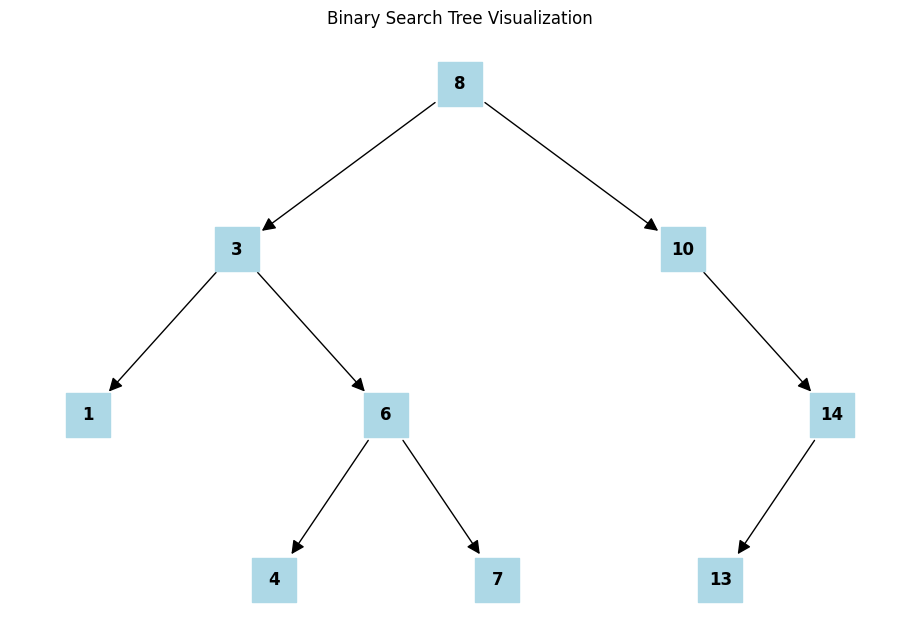

BST with 9 nodes


In [13]:
print("")
print("")
print ('Display Figure of Tree:')
print(tree)

In [14]:

print("")
print('Height of the Tree:')
print(tree.height(tree.root))


Height of the Tree:
4
